In [18]:
# Using example code from http://scikit-learn.org/stable/modules/tree.html
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn import svm, datasets
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydot
import os.path
import matplotlib.pyplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
# Load the iris dataset
iris = load_iris()

In [ ]:
##################################################################
# Split dataset 
##################################################################

# add random 
random_state = np.random.RandomState(0)

# split into training and test
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target,
                                                    test_size=.4,random_state=random_state)


In [ ]:
#len(data_train)
#len(data_test)
len(target_train)
#len(target_test)

In [ ]:
#################################################################
# Create new Model
#################################################################
# Create a simple classifier
clf = svm.LinearSVC(random_state=random_state)
clf.fit(data_train, target_train)
# calculating the target score for each class
#target_score_Setosa = clf.decision_function(data_test)

In [ ]:
data_predictions = clf.predict(data_test)
data_predictions #using model to predict the 'target' for the data testing split

In [ ]:
len(data_test)

In [ ]:
len(data_predictions)

In [ ]:
#################################################################
# Binarize my dataset
#################################################################
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html


In [ ]:
len(target_test) #testing split, these are the true values

In [ ]:
binarized_truth_classifications = lb.fit_transform(target_test)
binarized_truth_classifications

In [ ]:
len(data_predictions)

In [ ]:
lb.fit_transform(data_predictions).shape

In [ ]:
binarized_data_predictions = lb.fit_transform(data_predictions)
binarized_data_predictions

In [ ]:
len(binarized_data_predictions[:])

In [ ]:
#binarizing the dataset for the precision-recall score and separating the columns into the predictions for each respective class
data_predict_Setosa = binarized_data_predictions[:,0]
data_predict_Setosa
data_predict_Versicolor = binarized_data_predictions[:,1]
data_predict_Versicolor
data_predict_Virginica = binarized_data_predictions[:,2]
data_predict_Virginica

In [ ]:
len(data_predict_Setosa)

In [ ]:
# binarizing the actual classifications for each respective class 
data_truth_Setosa = binarized_truth_classifications[:,0]
data_truth_Setosa
data_truth_Versicolor = binarized_truth_classifications[:,1]
data_truth_Versicolor
data_truth_Virginica = binarized_truth_classifications[:,2]
data_truth_Virginica

In [ ]:
data_predict_Setosa

In [ ]:
len(data_predict_Setosa)

In [ ]:
len(data_truth_Setosa)

In [ ]:
#################################################################
# Compute Precision-Recall Score
#################################################################
#target_score_Setosa = clf.decision_function(data_predict_Setosa)
#average_precision = average_precision_score(target_test, target_score)
average_precision_Setosa = average_precision_score(data_predict_Setosa, data_truth_Setosa)
average_precision_Versicolor = average_precision_score(data_predict_Versicolor, data_truth_Versicolor)
average_precision_Virginica = average_precision_score(data_predict_Virginica, data_truth_Virginica)

print('Average precision-recall score for Setosa Class: {0:0.2f}'.format(
      average_precision_Setosa))
print('Average precision-recall score for Versicolor Class: {0:0.2f}'.format(
      average_precision_Versicolor))
print('Average precision-recall score for Virginica Class: {0:0.2f}'.format(
      average_precision_Virginica))

In [ ]:
###############################################
# Plotting Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#SETOSA CLASS
precisionSetosa, recallSetosa, _ = precision_recall_curve(data_predict_Setosa, data_truth_Setosa)

plt.step(recallSetosa, precisionSetosa, color='b', alpha=0.2,
         where='post')
plt.fill_between(recallSetosa, precisionSetosa, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Setosa Class: AUC={0:0.2f}'.format(
          average_precision_Setosa))



In [ ]:
#VERSICOLOR CLASS
precisionVersicolor, recallVersicolor, _ = precision_recall_curve(data_predict_Versicolor, data_truth_Versicolor)

plt.step(recallVersicolor, precisionVersicolor, color='b', alpha=0.2,
         where='post')
plt.fill_between(recallVersicolor, precisionVersicolor, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Versicolor Class: AUC={0:0.2f}'.format(
          average_precision_Versicolor))

In [ ]:
#VIRGINICA CLASS
precisionVirginica, recallVirginica, _ = precision_recall_curve(data_predict_Virginica, data_truth_Virginica)

plt.step(recallVirginica, precisionVirginica, color='b', alpha=0.2,
         where='post')
plt.fill_between(recallVirginica, precisionVirginica, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for Virginica Class: AUC={0:0.2f}'.format(
          average_precision_Virginica))

In [ ]:
#####################################
# IGNORE THE REST - JUST SOME TESTING
#####################################

In [ ]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data)

In [ ]:
iris_df['flower_class'] = iris.target
#iris_df['sepalLength'] = iris.data[%0]
#iris.data

In [ ]:
#iris_df

In [ ]:
random_indices = random.choice(range(0, 150), replace=False, size=100)

In [ ]:
#random_indices

In [ ]:
test_indices = [i for i in range(0, 150) if i not in random_indices]

In [ ]:
#test_indices

In [ ]:
training = iris_df.iloc[random_indices]

In [ ]:
testing = iris_df.iloc[test_indices]

In [ ]:
#iris_df.iloc[test_indices]

In [ ]:
#input_cols = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
input_cols = [0, 1, 2, 3]

In [ ]:
#training[input_cols]

In [ ]:
# Train the model
model_1 = tree.DecisionTreeClassifier()
model_1.fit(training[input_cols], training['flower_class']) #fitting the data to the target (known classifications) to a model


In [ ]:
#predict for the accuracy of the model 
model_1.predict(testing[input_cols])

In [ ]:
#testing['flower_class']

In [ ]:
# create the flow chart visualizaton and write it to a PDF on the Desktop
dot_data = StringIO()


In [ ]:
tree.export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]

graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree.pdf"))

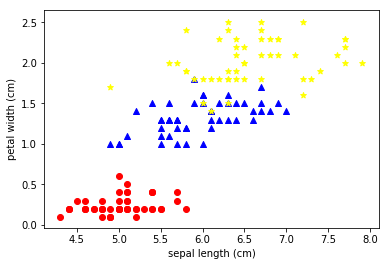

In [16]:
# Plot two of the features (the first and fourth columns, in this case)
X_INDEX = 0
Y_INDEX = 3

x = iris.data[:,X_INDEX]
y = iris.data[:,Y_INDEX]

# The data are in order by type. Find out where the other types start
start_type_one = list(iris.target).index(1)
start_type_two = list(iris.target).index(2)

# put the input data on the graph, with different colors and shapes for each type
matplotlib.pyplot.scatter(x[:start_type_one], y[:start_type_one], c="red", marker="o")
matplotlib.pyplot.scatter(x[start_type_one:start_type_two], y[start_type_one:start_type_two], c="blue", marker="^")
matplotlib.pyplot.scatter(x[start_type_two:], y[start_type_two:], c="yellow", marker="*")

# Label the axes
matplotlib.pyplot.xlabel(iris.feature_names[X_INDEX])
matplotlib.pyplot.ylabel(iris.feature_names[Y_INDEX])

matplotlib.pyplot.show()